<a href="https://colab.research.google.com/github/Sham-29/Project/blob/main/maths_symbol_prediciton_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install unrar
!unrar x "/content/drive/MyDrive/data/data.rar" "/content/dataset/"

Streaming output truncated to the last 5000 lines.
Extracting  /content/dataset/extracted_images/z/exp75725.jpg              98%  OK 
Extracting  /content/dataset/extracted_images/z/exp75743.jpg              98%  OK 
Extracting  /content/dataset/extracted_images/z/exp75756.jpg              98%  OK 
Extracting  /content/dataset/extracted_images/z/exp75762.jpg              98%  OK 
Extracting  /content/dataset/extracted_images/z/exp75782.jpg              98%  OK 
Extracting  /content/dataset/extracted_images/z/exp75787.jpg              98%  OK 
Extracting  /content/dataset/extracted_images/z/exp75789.jpg              98%  OK 
Extracting  /content/dataset/extracted_images/z/exp75831.jpg              98%  OK 
Extracting  /content/dataset/extracted_images/z/exp75832.jpg              98%  OK 
Extracting  /content/dataset/extracted_images/z/exp75834.jpg              98%  OK 
Extracting  /content/dataset/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 593.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 100.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/dataset/extracted_images")
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/dataset/extracted_images",
    validation_split=0.2,
    subset="training",
    seed=123,shuffle=True)
ds_val = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/dataset/extracted_images",
    validation_split=0.2,
    subset="validation",
    seed=123,shuffle=True)


Found 375974 files belonging to 82 classes.
Found 375974 files belonging to 82 classes.
Using 300780 files for training.
Found 375974 files belonging to 82 classes.
Using 75194 files for validation.


In [ ]:
val_batches = tf.data.experimental.cardinality(ds_val)
test_data = ds_val.take(val_batches // 2)
ds_val = ds_val.skip(val_batches // 2)
print(f"Total batches: {tf.data.experimental.cardinality(dataset).numpy()}")
print(f"Train batches: {tf.data.experimental.cardinality(ds_train).numpy()}")
print(f"Validation batches: {tf.data.experimental.cardinality(ds_val).numpy()}")
print(f"Test batches: {tf.data.experimental.cardinality(test_data).numpy()}")

Total batches: 11750
Train batches: 9400
Validation batches: 1175
Test batches: 1175


In [ ]:
import tensorflow_datasets as tfds
batch_size = 32
dataset_name = dataset
class_names = dataset.class_names

In [ ]:
size = (128,128)
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_val = ds_val.map(lambda image, label: (tf.image.resize(image, size), label))
test_data = test_data.map(lambda image, label: (tf.image.resize(image, size), label))

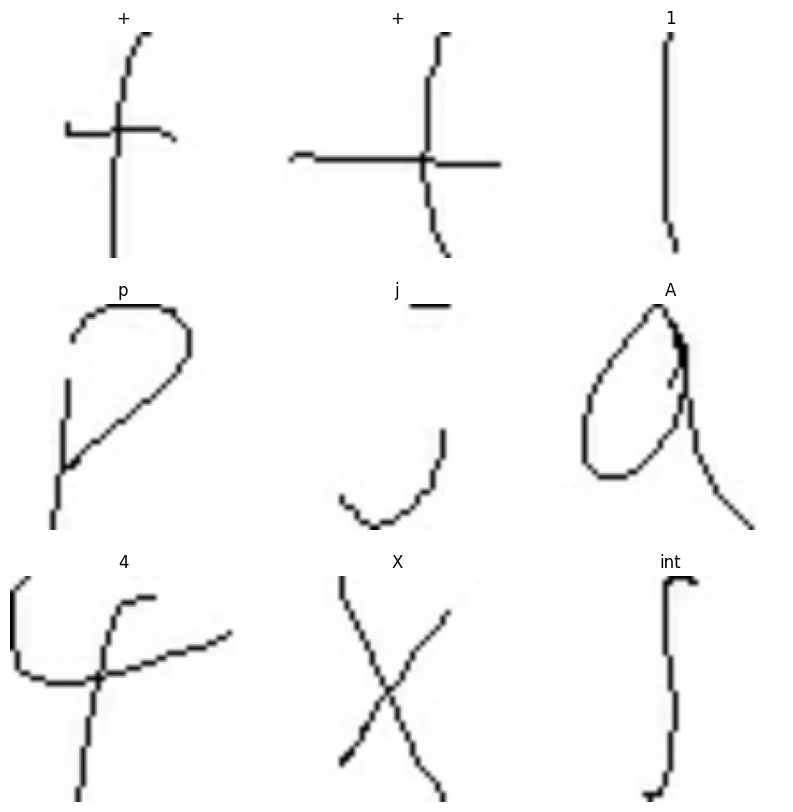

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for images, labels in ds_train.take(1):
    print("Image shape:", images.shape)
    print("Label shape:", labels.shape)
    break
for images, labels in test_data.take(1):
    print("Image shape:", images.shape)
    print("Label shape:", labels.shape)
    break

Image shape: (32, 128, 128, 3)
Label shape: (32,)
Image shape: (32, 128, 128, 3)
Label shape: (32,)


In [ ]:
def convert_to_grayscale(image, label):
    image = tf.image.rgb_to_grayscale(image)
    return image, label

# Apply grayscale conversion
ds_train = ds_train.map(convert_to_grayscale)
ds_val = ds_val.map(convert_to_grayscale)
test_data = test_data.map(convert_to_grayscale)

In [ ]:
for images, labels in ds_train.take(1):
    print("Image shape:", images.shape)
    print("Label shape:", labels.shape)
    break
for images, labels in test_data.take(1):
    print("Image shape:", images.shape)
    print("Label shape:", labels.shape)
    break

Image shape: (32, 128, 128, 1)
Label shape: (32,)
Image shape: (32, 128, 128, 1)
Label shape: (32,)


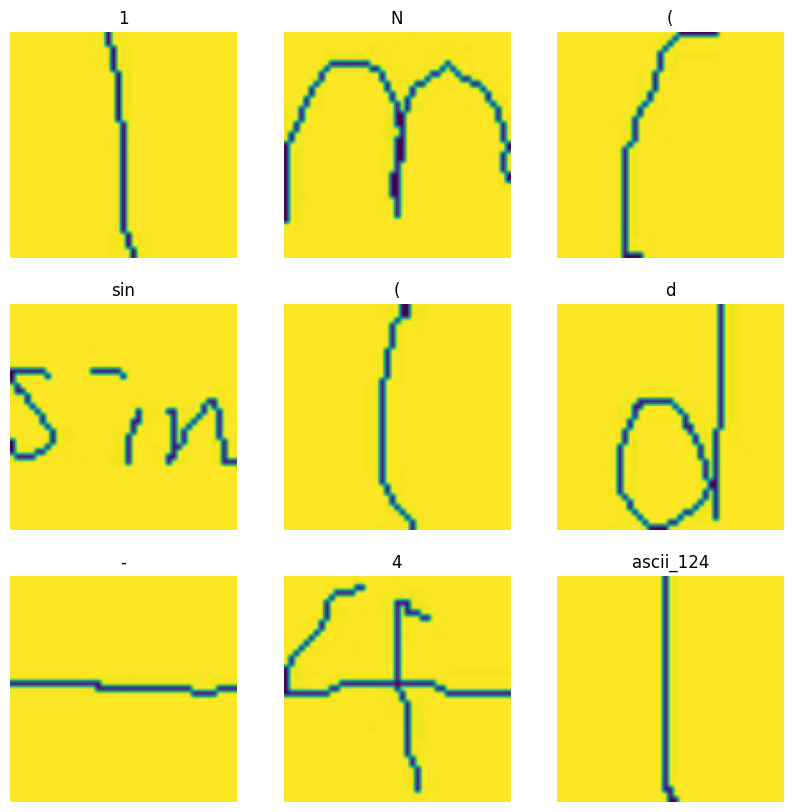

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Apply normalization
ds_train = ds_train.map(normalize)
ds_val = ds_val.map(normalize)
test_data = test_data.map(normalize)

In [ ]:
for images, labels in ds_train.take(1):
    print(images[0].numpy())
    break
for images, labels in test_data.take(1):
    print(images[0].numpy())
    break

[[[0.99990004]
  [0.99990004]
  [0.99990004]
  ...
  [0.99990004]
  [0.99990004]
  [0.99990004]]

 [[0.99990004]
  [0.99990004]
  [0.99990004]
  ...
  [0.99990004]
  [0.99990004]
  [0.99990004]]

 [[0.99990004]
  [0.99990004]
  [0.99990004]
  ...
  [0.99990004]
  [0.99990004]
  [0.99990004]]

 ...

 [[0.99990004]
  [0.99990004]
  [0.99990004]
  ...
  [0.99990004]
  [0.99990004]
  [0.99990004]]

 [[0.99990004]
  [0.99990004]
  [0.99990004]
  ...
  [0.99990004]
  [0.99990004]
  [0.99990004]]

 [[0.99990004]
  [0.99990004]
  [0.99990004]
  ...
  [0.99990004]
  [0.99990004]
  [0.99990004]]]
[[[0.99990004]
  [0.99990004]
  [0.99990004]
  ...
  [0.99990004]
  [0.99990004]
  [0.99990004]]

 [[0.99990004]
  [0.99990004]
  [0.99990004]
  ...
  [0.99990004]
  [0.99990004]
  [0.99990004]]

 [[0.99990004]
  [0.99990004]
  [0.99990004]
  ...
  [0.99990004]
  [0.99990004]
  [0.99990004]]

 ...

 [[0.99990004]
  [0.99990004]
  [0.99990004]
  ...
  [0.99990004]
  [0.99990004]
  [0.99990004]]

 [[0.999

In [ ]:
for images, labels in ds_train.take(1):
    print("Image shape:", images[0].shape)
    print("Max pixel value:", tf.reduce_max(images))  # Should be 1.0 (normalized)
    print("Min pixel value:", tf.reduce_min(images))  # Should be 0.0 (normalized)
    break

Image shape: (128, 128, 1)
Max pixel value: tf.Tensor(0.99990004, shape=(), dtype=float32)
Min pixel value: tf.Tensor(0.0, shape=(), dtype=float32)


In [ ]:
for images, labels in ds_train.take(1):
    print("Batch shape:", images.shape)
    print("Label shape:", labels.shape)
    break

Batch shape: (32, 128, 128, 1)
Label shape: (32,)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Added dropout
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Added dropout
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 82)                  │          21,074 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,475,346 (101.00 MB)

 Trainable params: 26,475,346 (101.00 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=5,
)


Epoch 1/5
9400/9400 ━━━━━━━━━━━━━━━━━━━━ 483s 51ms/step - accuracy: 0.7810 - loss: 0.7998 - val_accuracy: 0.9359 - val_loss: 0.2203
Epoch 2/5
9400/9400 ━━━━━━━━━━━━━━━━━━━━ 430s 46ms/step - accuracy: 0.8925 - loss: 0.3670 - val_accuracy: 0.9542 - val_loss: 0.1542
Epoch 3/5
9400/9400 ━━━━━━━━━━━━━━━━━━━━ 450s 48ms/step - accuracy: 0.9185 - loss: 0.2706 - val_accuracy: 0.9641 - val_loss: 0.1216
Epoch 4/5
9400/9400 ━━━━━━━━━━━━━━━━━━━━ 451s 48ms/step - accuracy: 0.9342 - loss: 0.2207 - val_accuracy: 0.9690 - val_loss: 0.1062
Epoch 5/5
9400/9400 ━━━━━━━━━━━━━━━━━━━━ 428s 46ms/step - accuracy: 0.9437 - loss: 0.1894 - val_accuracy: 0.9751 - val_loss: 0.0858


In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

1175/1175 ━━━━━━━━━━━━━━━━━━━━ 38s 32ms/step - accuracy: 0.9759 - loss: 0.0810
Test Accuracy: 97.45%


In [ ]:

# Load the model
model_path = "/content/drive/MyDrive/model_data/finalmodel.h5"
model = tf.keras.models.load_model(model_path)
with open("/content/drive/MyDrive/model_data/finalhistory.pkl", "rb") as f:
    history = pickle.load(f)

# Check model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 82)                  │          21,074 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,475,348 (101.00 MB)

 Trainable params: 26,475,346 (101.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:

def preprocess_test_image(image):
    image = tf.image.resize(image, (128, 128))
    image = image / 255.0
    # Add batch dimension (1, 64, 64, 1)
    image = tf.expand_dims(image, axis=0)
    return image


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Predicted Symbol: 69
Predicted Class: sin


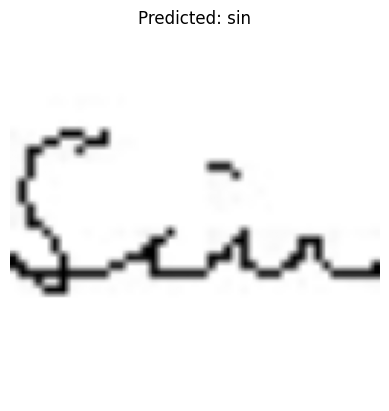

In [ ]:
def predict_from_image(image_path, model):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=1)
    processed_image = preprocess_test_image(image)
    prediction = model.predict(processed_image)
    predicted_class = tf.argmax(prediction, axis=1).numpy()[0]
    return predicted_class
test_image_path = "/content/drive/MyDrive/Datasets/HandwrittenMathSymbols/extracted_images/sin/exp10.jpg"
predicted_label = predict_from_image(test_image_path, model)
print(f"Predicted Symbol: {predicted_label}")
class_names = ['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6',
               '7', '8', '9', '=', 'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R',
               'S', 'T', 'X', '[', ']', 'alpha', 'ascii_124', 'b', 'beta', 'cos',
               'd', 'div', 'e', 'exists', 'f', 'forall', 'forward_slash', 'gamma',
               'geq', 'gt', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda',
               'ldots', 'leq', 'lim', 'log', 'lt', 'mu', 'neq', 'o', 'p', 'phi',
               'pi', 'pm', 'prime', 'q', 'rightarrow', 'sigma', 'sin', 'sqrt',
               'sum', 'tan', 'theta', 'times', 'u', 'v', 'w', 'y', 'z', '{', '}']

predicted_class = class_names[predicted_label]
print(f"Predicted Class: {predicted_class}")
image = tf.io.read_file(test_image_path)
image = tf.image.decode_jpeg(image, channels=1)
processed_image = preprocess_test_image(image)
plt.imshow(processed_image.numpy().squeeze(), cmap="gray")
plt.title(f"Predicted: {predicted_class}")
plt.axis("off")
plt.show()



In [ ]:
import matplotlib.pyplot as plt

# Get a single batch from the dataset
images, sample_label = next(iter(test_data))

# Display actual label
print("Actual Label:", sample_label.numpy()[0])

# Model prediction
pred = model.predict(images[:1])  # Predict on first image
predicted_label = pred.argmax()  # Get class index with highest probability
print("Predicted Label:", predicted_label)

# Display the image
plt.imshow(images[0].numpy().squeeze(), cmap="gray")  # Ensure it's grayscale
plt.title(f"Actual: {sample_label.numpy()[0]}, Predicted: {predicted_label}")
plt.axis("off")
plt.show()


NameError: name 'test_data' is not defined

In [ ]:
print("Class Names Mapping:", class_names)
print(f"Predicted Class Index: {predicted_label}")

Class Names Mapping: ['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R', 'S', 'T', 'X', '[', ']', 'alpha', 'ascii_124', 'b', 'beta', 'cos', 'd', 'div', 'e', 'exists', 'f', 'forall', 'forward_slash', 'gamma', 'geq', 'gt', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'mu', 'neq', 'o', 'p', 'phi', 'pi', 'pm', 'prime', 'q', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', 'u', 'v', 'w', 'y', 'z', '{', '}']
Predicted Class Index: 64


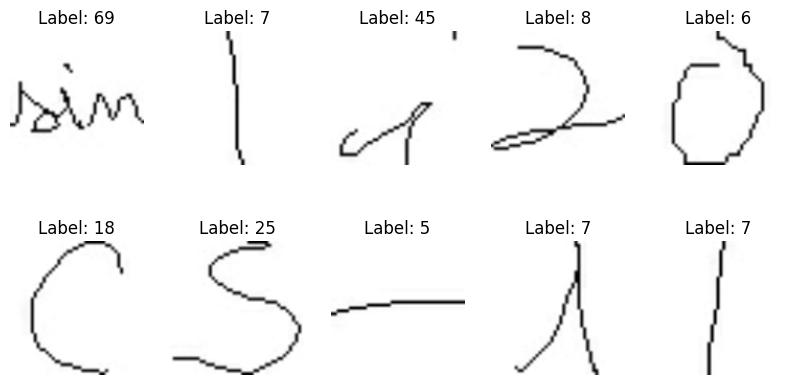

In [ ]:
import matplotlib.pyplot as plt
images, labels = next(iter(ds_train))

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i].numpy().squeeze(), cmap="gray")  # Adjust if necessary
    plt.title(f"Label: {labels[i].numpy()}")
    plt.axis("off")
plt.show()


In [ ]:
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf  # Assuming you're using TensorFlow/Keras

def preprocess_image(image_path, n):
    """ Preprocess the image: Crop, resize, threshold, and normalize """
    img = Image.open(image_path).convert("L")  # Convert to grayscale
    width, height = img.size
    div = width // n  # Segment width
    segments = []

    for i in range(n):
        left = i * div
        top = 0
        right = (i + 1) * div
        bottom = height

        seg = img.crop((left, top, right, bottom))
        seg_resized = seg.resize((128, 128))  # Resize to 100x100

        seg_array = np.array(seg_resized)  # Convert to NumPy array
        _, bin_seg = cv2.threshold(seg_array, 127, 255, cv2.THRESH_BINARY)  # Binarization
        bin_seg = bin_seg / 255.0  # Normalize

        segments.append(bin_seg)

    return np.array(segments).reshape(-1, 128, 128, 1)  # Reshape for CNN input

def recognize_equation(image_path, num_segments, model_path, label_mapping):

    # Preprocess the input image
    processed_segments = preprocess_image(image_path, num_segments)

    # Predict the symbols for each segment
    predictions = model.predict(processed_segments)

    # Convert predictions to readable characters
    predicted_chars = [label_mapping[np.argmax(pred)] for pred in predictions]

    # Return the recognized equation
    return "".join(predicted_chars)

# Example usage
image_path = "/content/drive/MyDrive/Datasets/HandwrittenMathSymbols/extracted_images/!/!_100082.jpg"  # Replace with your image file
num_segments = 5  # Adjust as needed

# Define your label mapping (update this based on your model's classes)
label_mapping = {
    0: '!', 1: '(', 2: ')', 3: '+', 4: ',', 5: '-', 6: '0', 7: '1', 8: '2', 9: '3',
    10: '4', 11: '5', 12: '6', 13: '7', 14: '8', 15: '9', 16: '=', 17: 'A', 18: 'C',
    19: 'Delta', 20: 'G', 21: 'H', 22: 'M', 23: 'N', 24: 'R', 25: 'S', 26: 'T',
    27: 'X', 28: '[', 29: ']', 30: 'alpha', 31: 'ascii_124', 32: 'b', 33: 'beta',
    34: 'cos', 35: 'd', 36: 'div', 37: 'e', 38: 'exists', 39: 'f', 40: 'forall',
    41: 'forward_slash', 42: 'gamma', 43: 'geq', 44: 'gt', 45: 'i', 46: 'in',
    47: 'infty', 48: 'int', 49: 'j', 50: 'k', 51: 'l', 52: 'lambda', 53: 'ldots',
    54: 'leq', 55: 'lim', 56: 'log', 57: 'lt', 58: 'mu', 59: 'neq', 60: 'o',
    61: 'p', 62: 'phi', 63: 'pi', 64: 'pm', 65: 'prime', 66: 'q', 67: 'rightarrow',
    68: 'sigma', 69: 'sin', 70: 'sqrt', 71: 'sum', 72: 'tan', 73: 'theta', 74: 'times',
    75: 'u', 76: 'v', 77: 'w', 78: 'y', 79: 'z', 80: '{', 81: '}'
}


recognized_equation = recognize_equation(image_path, num_segments, model_path, label_mapping)
print("Recognized Equation:", recognized_equation)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Recognized Equation: --pm--


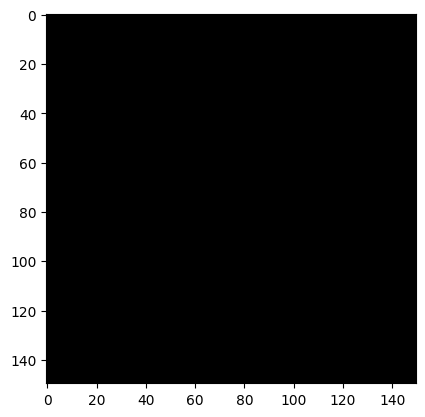

In [ ]:
import cv2
import numpy as np
from PIL import Image

def preprocess_image(image_path, n):
    # Step 1: Load the image
    img = Image.open(image_path).convert("L")  # Convert to grayscale
    width, height = img.size

    # Step 2: Image Cropping
    div = width // n  # Segment width
    segments = []

    for i in range(n):
        left = i * div
        top = 0
        right = (i + 1) * div
        bottom = height

        # Crop the segment
        seg = img.crop((left, top, right, bottom))

        # Step 3: Image Resizing (100x100)
        seg_resized = seg.resize((150, 150))

        # Step 4: Thresholding (Convert to binary)
        seg_array = np.array(seg_resized)
        _, bin_seg = cv2.threshold(seg_array, 127, 255, cv2.THRESH_BINARY)

        # Step 5: Normalization (Divide by 255 to scale between 0-1)
        bin_seg = bin_seg / 255.0

        segments.append(bin_seg)

    return segments

# Example usage
image_path = "/content/drive/MyDrive/Datasets/HandwrittenMathSymbols/extracted_images/!/!_100082.jpg"  # Replace with your image file
num_segments = 5  # Adjust based on your requirement
processed_segments = preprocess_image(image_path, num_segments)

# Display one segment as an example
import matplotlib.pyplot as plt
plt.imshow(processed_segments[0], cmap='gray')
plt.show()


In [ ]:
for i, pred in enumerate(predictions):
    predicted_index = np.argmax(pred)
    print(f"Segment {i}: Predicted Index = {predicted_index}, Label = {label_mapping.get(predicted_index, '<UNK>')}")


NameError: name 'predictions' is not defined

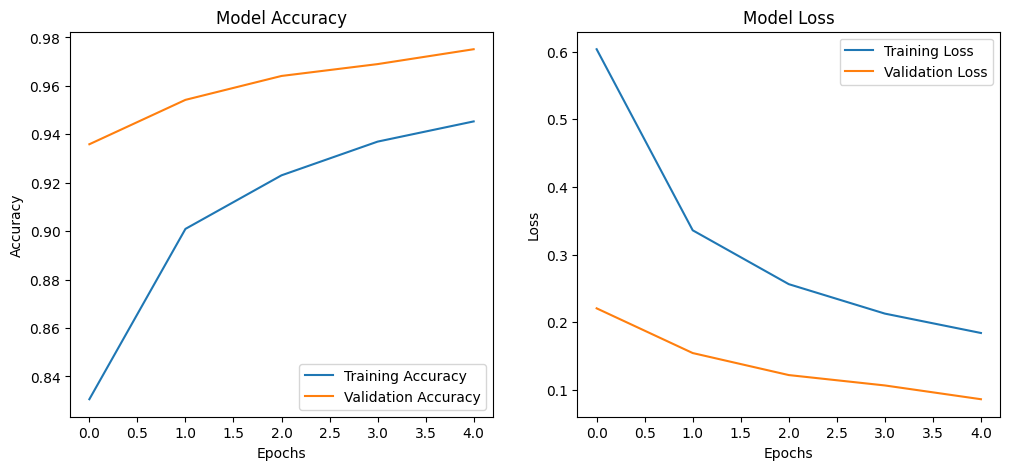

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


In [ ]:
%whos

Variable                Type              Data/Info
---------------------------------------------------
class_names             list              n=82
drive                   module            <module 'google.colab.dri<...>s/google/colab/drive.py'>
drive_path              str               /content/drive/MyDrive/model_data
f                       BufferedReader    <_io.BufferedReader name=<...>l_data/finalhistory.pkl'>
history                 dict              n=4
image                   EagerTensor       tf.Tensor(\n[[[255]\n  [2<...>(45, 45, 1), dtype=uint8)
model                   Sequential        <Sequential name=sequential_1, built=True>
model_path              str               /content/drive/MyDrive/model_data/finalmodel.h5
pickle                  module            <module 'pickle' from '/u<...>ib/python3.11/pickle.py'>
plt                     module            <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
predict_from_image      function          <function predict_fr

In [ ]:
print(model.history)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
y_true, y_pred = [], []
for images, labels in test_data:
    preds = model.predict(images)
    y_pred.extend(tf.argmax(preds, axis=1).numpy())
    y_true.extend(labels.numpy())
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_true, y_pred)
report = classification_report(y_true, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{report}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Symbol: 69
Predicted Class: sin


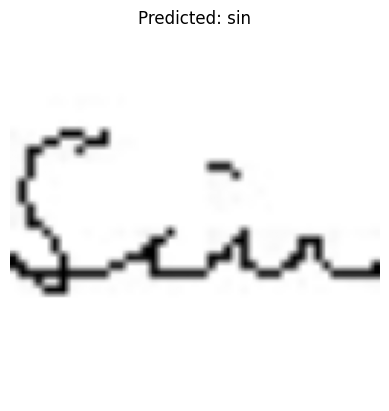

In [ ]:
def predict_from_image(image_path, model):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=1)
    processed_image = preprocess_test_image(image)
    prediction = model.predict(processed_image)
    predicted_class = tf.argmax(prediction, axis=1).numpy()[0]
    return predicted_class
test_image_path = "/content/drive/MyDrive/Datasets/HandwrittenMathSymbols/extracted_images/sin/exp10.jpg"
predicted_label = predict_from_image(test_image_path, model)
print(f"Predicted Symbol: {predicted_label}")
class_names = ['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6',
               '7', '8', '9', '=', 'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R',
               'S', 'T', 'X', '[', ']', 'alpha', 'ascii_124', 'b', 'beta', 'cos',
               'd', 'div', 'e', 'exists', 'f', 'forall', 'forward_slash', 'gamma',
               'geq', 'gt', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda',
               'ldots', 'leq', 'lim', 'log', 'lt', 'mu', 'neq', 'o', 'p', 'phi',
               'pi', 'pm', 'prime', 'q', 'rightarrow', 'sigma', 'sin', 'sqrt',
               'sum', 'tan', 'theta', 'times', 'u', 'v', 'w', 'y', 'z', '{', '}']

predicted_class = class_names[predicted_label]
print(f"Predicted Class: {predicted_class}")
image = tf.io.read_file(test_image_path)
image = tf.image.decode_jpeg(image, channels=1)
processed_image = preprocess_test_image(image)
plt.imshow(processed_image.numpy().squeeze(), cmap="gray")
plt.title(f"Predicted: {predicted_class}")
plt.axis("off")
plt.show()

